# DSC540 Project 4

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   

Good Luck!

### Ronaldlee Ejalu

**Honor Pledge:**  
I pledge on my honor that I, **Ronaldlee Ejalu**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## Q1 [10]

A drug company would like to introduce a drug to help patients with Alzheimer's. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. 
- The company interviews 100 people and 15 of them say that they will buy the drug. (This the observed data: n=100, observed=15) $->$ likelihood
- If in the past new drugs tend to capture a proportion between say .10 and .40 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(0.10, 0.40)$ $->$ prior

### What is the traceplot of $\theta$ using Bayesian analysis to estimate the market share for the new drug?
- Sample 10000 draws
- Plot the traceplot

In [1]:
import pymc3 as pm
import arviz as az

In [2]:
n=100
observed=15

C:\Users\LO7831~1\Temp/ipykernel_34812/3963630357.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=10000, tune=1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 45 seconds.
The acceptance probability does not match the target. It is 0.9194997984142905, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7195894894737971, but should be close to 0.8. Try to increase the number of tuning steps.


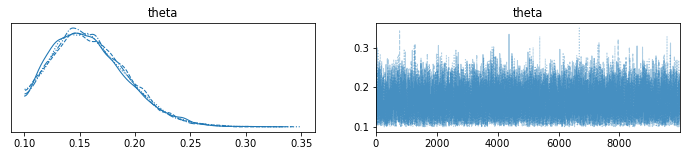

In [3]:
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name='theta', lower=0.10, upper=0.40)
    
    # Likelihood
    x = pm.Binomial(name='x', p=theta, n=n, observed=observed)

    # Posterior
    # draw 10000 posterior samples
    trace = pm.sample(draws=10000, tune=1000, chains=4)
    
    # Plot the trace plot
    az.plot_trace(trace)

### Plot the posterior distribution plot of $ \theta $
- What is the mean posterior value?

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\REJALU\.conda\envs\renv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


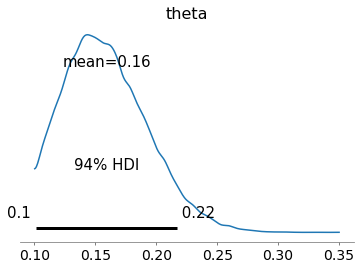

In [4]:
# Plot the posterior of trace
az.plot_posterior(trace);

<p>The value of the mean posterior is 0.16.</p>

In [5]:
display(az.summary(trace))

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\REJALU\.conda\envs\renv\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.16,0.034,0.101,0.217,0.0,0.0,11806.0,10150.0,1.0



## Bayesian Network Analysis

In this part we will be analyzing medical diagnosis using Bayes Nets. The structure and the Conditional Probabability Distribution tables are shown in the figure below.

![MedicalDiagnosis](Med-diag-bnet.jpg)

- In the first few questions you will build the Bayes Net, set up the Conditional Probability Distribution tables, and associate the CPDs to the network.   
- These steps are extremely important and crucial. Make sure you do the set up correctly, as everything else depends on that.   

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [7]:
# import pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [8]:
import sklearn
sklearn.__version__

'1.0.2'

### These are the packages I used

In [9]:
# Your package imports here

## Q2 [10]

**Define the model structure.** 

You need to define the network by passing a list of edges. 

In [10]:
model = BayesianNetwork([('Smokes', 'LungDisease'), ('LungDisease', 'ShortnessBreath'), ('LungDisease', 'ChestPain'), ('LungDisease', 'Cough'), ('Cold', 'Cough'), ('Cold', 'Fever')])

In [11]:
# Your code
# model = BayesianModel([('Smokes', 'LungDisease'),.........])

In [12]:
model.edges()

OutEdgeView([('Smokes', 'LungDisease'), ('LungDisease', 'ShortnessBreath'), ('LungDisease', 'ChestPain'), ('LungDisease', 'Cough'), ('Cold', 'Cough'), ('Cold', 'Fever')])

## Q3 [15] 

**Define individual CPDs**
- Define the CPDs using the state names of the variables. 

In [13]:
cpd_Smokes = TabularCPD(variable='Smokes', variable_card=2, values=[[0.2], [0.8]], state_names={'Smokes' : ['T', 'F']})
print(cpd_Smokes)


cpd_LungDisease = TabularCPD(variable='LungDisease', 
                             variable_card=2, 
                             values=[[0.1009, 0.001],
                                     [0.8991, 0.999]],
                             evidence=['Smokes'],
                             evidence_card=[2],
                            state_names={'Smokes' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_LungDisease)



+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+
+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [14]:
cpd_ShortnessBreath = TabularCPD(variable='ShortnessBreath', 
                                   variable_card=2, 
                                   values=[[0.208, 0.01], 
                                           [0.792, 0.99]], 
                                   evidence=['LungDisease'], 
                                   evidence_card=[2], 
                                   state_names={
                                                   'LungDisease':['T', 'F'], 
                                                   'ShortnessBreath':['T','F']
                                               }
                                  )
print(cpd_ShortnessBreath)

+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+


In [15]:
cpd_ChestPain = TabularCPD(variable='ChestPain', 
                           variable_card=2, 
                           values=[[0.208, 0.01], 
                                   [0.792, 0.99]
                                  ],evidence=['LungDisease'], 
                           evidence_card=[2], 
                                   state_names={
                                                   'LungDisease':['T', 'F'], 
                                                   'ChestPain':['T','F']
                                               }
                          )
print(cpd_ChestPain)

+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+


In [16]:
cpd_Cold = TabularCPD(variable='Cold', variable_card=2, values=[[0.02], [0.98]], state_names={'Cold' : ['T', 'F']})
print(cpd_Cold)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+


In [17]:
cpd_Cough = TabularCPD(variable='Cough', 
                       variable_card=2, 
                       values=[[0.7525, 0.505, 0.505, 0.01], 
                               [0.2475, 0.495, 0.495, 0.99]], 
                       evidence=['LungDisease', 'Cold'], 
                       evidence_card=[2, 2], state_names={
                                                           'LungDisease': ['T', 'F'], 
                                                           'Cold' : ['T', 'F'], 
                                                           'Cough' : ['T', 'F']
                                                        }
                      )
print(cpd_Cough)

+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(T) | LungDisease(F) | LungDisease(F) |
+-------------+----------------+----------------+----------------+----------------+
| Cold        | Cold(T)        | Cold(F)        | Cold(T)        | Cold(F)        |
+-------------+----------------+----------------+----------------+----------------+
| Cough(T)    | 0.7525         | 0.505          | 0.505          | 0.01           |
+-------------+----------------+----------------+----------------+----------------+
| Cough(F)    | 0.2475         | 0.495          | 0.495          | 0.99           |
+-------------+----------------+----------------+----------------+----------------+


In [18]:
cpd_Fever = TabularCPD(variable='Fever', 
                       variable_card=2, 
                       values=[[0.307, 0.01], 
                               [0.693, 0.99]], 
                       evidence=['Cold'], 
                       evidence_card=[2], 
                       state_names={
                                       'Cold' : ['T', 'F'], 
                                       'Fever' : ['T', 'F']
                                   }
                      )
print(cpd_Fever)

+----------+---------+---------+
| Cold     | Cold(T) | Cold(F) |
+----------+---------+---------+
| Fever(T) | 0.307   | 0.01    |
+----------+---------+---------+
| Fever(F) | 0.693   | 0.99    |
+----------+---------+---------+


## Q4 [5] 
- Check that each of the CPDs are correct

In [19]:
cpd_Smokes

<TabularCPD representing P(Smokes:2) at 0x19356e55790>

In [20]:
print(cpd_Smokes)

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+


In [21]:
cpd_LungDisease

<TabularCPD representing P(LungDisease:2 | Smokes:2) at 0x19356e557c0>

In [22]:
print(cpd_LungDisease)

+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [23]:
cpd_Cold

<TabularCPD representing P(Cold:2) at 0x19356e55eb0>

In [24]:
print(cpd_Cold)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+


In [25]:
cpd_ShortnessBreath

<TabularCPD representing P(ShortnessBreath:2 | LungDisease:2) at 0x19356e556a0>

In [26]:
print(cpd_ShortnessBreath)

+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+


In [27]:
cpd_ChestPain

<TabularCPD representing P(ChestPain:2 | LungDisease:2) at 0x19356e55a30>

In [28]:
print(cpd_ChestPain)

+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+


In [29]:
cpd_Cough

<TabularCPD representing P(Cough:2 | LungDisease:2, Cold:2) at 0x19356e55d30>

In [30]:
print(cpd_Cough)

+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(T) | LungDisease(F) | LungDisease(F) |
+-------------+----------------+----------------+----------------+----------------+
| Cold        | Cold(T)        | Cold(F)        | Cold(T)        | Cold(F)        |
+-------------+----------------+----------------+----------------+----------------+
| Cough(T)    | 0.7525         | 0.505          | 0.505          | 0.01           |
+-------------+----------------+----------------+----------------+----------------+
| Cough(F)    | 0.2475         | 0.495          | 0.495          | 0.99           |
+-------------+----------------+----------------+----------------+----------------+


In [31]:
cpd_Fever

<TabularCPD representing P(Fever:2 | Cold:2) at 0x19356e60070>

In [32]:
print(cpd_Fever)

+----------+---------+---------+
| Cold     | Cold(T) | Cold(F) |
+----------+---------+---------+
| Fever(T) | 0.307   | 0.01    |
+----------+---------+---------+
| Fever(F) | 0.693   | 0.99    |
+----------+---------+---------+


## Q5 [5]
- Add the defined CPDs to the model (Associate the CPDs with the network)

In [33]:
model.add_cpds(cpd_Smokes, cpd_LungDisease, cpd_ShortnessBreath, cpd_ChestPain,  cpd_Cold, cpd_Cough, cpd_Fever)

model.check_model()

True

## Q6 [5]
- The cardinality of each of the nodes is 2 - True or False?

In [34]:
model.get_cardinality('Smokes')

2

In [35]:
model.get_cardinality('LungDisease')

2

In [36]:
model.get_cardinality('ShortnessBreath')

2

In [37]:
model.get_cardinality('ChestPain')

2

In [38]:
model.get_cardinality('Cough')

2

In [39]:
model.get_cardinality('Cold')

2

In [40]:
model.get_cardinality('Fever')

2

<p>It is True that the cardinalilty of each node is 2.</p>

### Q7 [10] 
**Find the probability of each event hapenning using the variable elimination method.**
- $ P(Smokes) $
- $ P(Cold) $
- $ P(LungDisease) $
- $ P(ShortnessBreath) $
- $ P(ChestPain) $
- $ P(Fever) $
- $ P(Cough) $
- $ P(LungDisease|Smokes=True) $
- $ P(LungDisease|Cough=True) $
- $ P(ShortnessBreath|Smokes=True) $
- $ P(ChestPain|Fever=True) $

In [41]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [42]:
dist = infer.query(['Smokes'], show_progress=False)
print(dist)

+-----------+---------------+
| Smokes    |   phi(Smokes) |
+===========+===============+
| Smokes(T) |        0.2000 |
+-----------+---------------+
| Smokes(F) |        0.8000 |
+-----------+---------------+


<p>The above shows probability which defines whether someone smokes or not. Without any knowledge of anything, 0.2 is the probability.</p>

In [43]:
# 𝑃(𝐶𝑜𝑙𝑑)
dist = infer.query(['Cold'], show_progress=False)
print(dist)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+


<p>The above shows probability which defines whether the patient has a cold or not. Without knowledge of anything, 0.02 is the probability.</p>

In [44]:
# 𝑃(LungDisease)
dist = infer.query(['LungDisease'], show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


<p>The above shows probability which defines whether the patient has a Lung Disease or not. Without knowledge of anything, 0.02 is the probability.</p>

In [45]:
# 𝑃(ShortnessOfBreath)
dist = infer.query(['ShortnessBreath'], show_progress=False)
print(dist)

+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0142 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9858 |
+--------------------+------------------------+


<p>The above shows probability which defines whether there is Shortness Of Breath or not. Without knowledge of anything, 0.0142 is the probability.|</p>

In [46]:
# P(ChestPain)
dist = infer.query(['ChestPain'], show_progress=False)
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


<p>The above shows the probability which defines whether someone has ChestPain or not. Without knowledge of anything,  0.0142 is the probability.</p>

In [47]:
# P(Fever)
dist = infer.query(['Fever'], show_progress=False)
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


<p>The above shows the probability which defines whether someone has Fever or not.Without knowledge of anything,  0.0159 is the probability.</p>

In [48]:
# 𝑃(𝐶𝑜𝑢𝑔ℎ)
dist = infer.query(['Cough'], show_progress=False)
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+


<p>The above shows the probability which defines whether someone has Cough or not. Without knowledge of anything,  0.0302 is the probability.</p>

In [49]:
# 𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒)
dist = infer.query(['LungDisease'], show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


In [50]:
# 𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)
dist = infer.query(['LungDisease'], evidence={'Smokes':'T'}, show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.1009 |
+----------------+--------------------+
| LungDisease(F) |             0.8991 |
+----------------+--------------------+


<p>The probability of LungDisease has changed to 0.1009. Also, this confirms that LungDisease and Smokes are not independent since the probability of LungDisease has changed by the value Smokes has taken. Now that LungDisease is changing, it means that LungDisease and Smokes are not independent from each other.</p> 

In [51]:
# 𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝐶𝑜𝑢𝑔ℎ=𝑇𝑟𝑢𝑒)
dist = infer.query(['LungDisease'], evidence={'Cough':'T'}, show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


<p>The probability of getting LungDisease has changed to 0.3545. Also, this confirms that LungDisease and Cough are not independent since the probability of LungDisease has changed by the value Cough has taken. Now that LungDisease is changing, it means that LungDisease and Cough are not independent from each other.</p> 

In [52]:
# 𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ)
dist = infer.query(['ShortnessBreath'], show_progress=False)
print(dist)

+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0142 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9858 |
+--------------------+------------------------+


In [53]:
# 𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)
dist = infer.query(['ShortnessBreath'], evidence={'Smokes':'T'}, show_progress=False)
print(dist)

+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0300 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9700 |
+--------------------+------------------------+


<p>The probability of having ShortnessBreath has changed to 0.03 which confirms that ShortnessBreath and Smokes are not independent because probability of ShortnessBreath has been changed by the value Smokes has taken.</p>

In [54]:
# 𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛)
dist = infer.query(['ChestPain'],  show_progress=False)
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


In [55]:
# 𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛|𝐹𝑒𝑣𝑒𝑟=𝑇𝑟𝑢𝑒)
dist = infer.query(['ChestPain'], evidence={'Fever':'T'}, show_progress=False)
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


<p>Given Fever it does not affect ChestPain any more; this means that ChestPain and Fever are independent.</p>

## Q8 [15] 
**Are the following  true? If not, can you make them independent by including info on the parent?**
1. Cough is independent from Fever. (Having knowledge about Fever does not change the probability of Cough) 
2. Fever is independent from Smokes. 
3. ChestPain is independent from Smokes.
4. ChestPain is independent from Smokes given LungDisease.


##### 1. Cough is independent from Fever

In [56]:
dist = infer.query(['Cough'], show_progress=False)
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'T'}, show_progress=False)
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'F'}, show_progress=False)
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.2091 |
+----------+--------------+
| Cough(F) |       0.7909 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0273 |
+----------+--------------+
| Cough(F) |       0.9727 |
+----------+--------------+


- Fever does affect Cough -> Not independent
- However, given the parent of both Fever and Cough (Cold), they should be independent.

In [57]:
dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'T'}, show_progress=False)
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'F'}, show_progress=False)
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'T'}, show_progress=False)
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'F'}, show_progress=False)
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


##### 2. Fever is independent from Smokes. 

In [58]:
dist = infer.query(['Fever'], show_progress=False)
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'T'}, show_progress=False)
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'F'}, show_progress=False)
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


<p>Smokes does not affect Fever so Fever is independent from Smokes.</p>

##### 3. ChestPain is independent from Smokes.

In [59]:
dist = infer.query(['ChestPain'], show_progress=False)
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T'}, show_progress=False)
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'F'}, show_progress=False)
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0102 |
+--------------+------------------+
| ChestPain(F) |           0.9898 |
+--------------+------------------+


<p>Smokes does affect ChestPain so they are not independent.</p>

<p>However, given the parent of both ChestPain and Smokes (LungDisease) they should be independent as demonstrated below:</p>

In [60]:
dist = infer.query(['ChestPain'], evidence={'LungDisease': 'F', 'Smokes':'T'}, show_progress=False)
print(dist)

dist = infer.query(['ChestPain'], evidence={'LungDisease': 'F', 'Smokes': 'F'}, show_progress=False)
print(dist)

dist = infer.query(['ChestPain'], evidence={'LungDisease': 'T', 'Smokes': 'T'}, show_progress=False)
print(dist)

dist = infer.query(['ChestPain'], evidence={'LungDisease': 'T', 'Smokes': 'F'}, show_progress=False)
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0100 |
+--------------+------------------+
| ChestPain(F) |           0.9900 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0100 |
+--------------+------------------+
| ChestPain(F) |           0.9900 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------

## Q9 [20]
1. Does having the knowledge that the person is coughing increase the probability of lung disease?
2. Does having the knowledge that the person is coughing increase the probability that the person has Cold?
3. Does having the knowledge that the person is coughing increase the probability that there is Fever?
4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?
5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?


##### 1. Does having the knowledge that the person is coughing increase the probability of lung disease? [5]

In [61]:
dist = infer.query(['LungDisease'], show_progress=False)
print(dist)
dist = infer.query(['LungDisease'], evidence={'Cough': 'T'}, show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


Having the knowledge that the person is coughing increases the probability of lung disease.

##### 2. Does having the knowledge that the person is coughing increase the probability that the person has Cold? [5]

In [62]:
dist = infer.query(['Cold'], show_progress=False)
print(dist)

dist = infer.query(['Cold'], evidence={'Cough': 'T'}, show_progress=False)
print(dist)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.3381 |
+---------+-------------+
| Cold(F) |      0.6619 |
+---------+-------------+


<p>Having the knowlegde that the person is coughing increases the probability that the person has Cold.</p>

##### 3. Does having the knowledge that the person is coughing increase the probability that there is Fever? [5]

In [63]:
dist = infer.query(['Fever'], show_progress=False)
print(dist)

dist = infer.query(['Fever'], evidence={'Cough': 'T'}, show_progress=False)
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.1104 |
+----------+--------------+
| Fever(F) |       0.8896 |
+----------+--------------+


<p>Having the knowledge that the person is coughing increases the probability that there is Fever.</p>

##### 4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?

In [64]:
# double check this
dist = infer.query(['Fever'], show_progress=False)
print(dist)

dist = infer.query(['Fever'], evidence={'Cold': 'T', 'Cough': 'T'}, show_progress=False)
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+


<p>Having knowledge that the person is coughing increases the probability that there is Fever, given the person has Cold.</p>

##### 5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?

In [65]:
dist = infer.query(['LungDisease'], show_progress=False)
print(dist)

dist = infer.query(['LungDisease'], evidence={'Fever': 'T'}, show_progress=False)
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


<p>Having knowlegde that the person has Fever <b>does not</b> increase the probability that there is Lung Disease.</p>

## Q10 [5]
1. What's the most probable state of Cough? 
2. What's the most probable state of Cough given Cold is True? 
3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

##### 1. What's the most probable state of Cough? 

In [66]:
infer.map_query(['Cough'], show_progress=False)

{'Cough': 'F'}

The most probable state of Cough is False.

##### 2. What's the most probable state of Cough given Cold is True? 

In [67]:
infer.map_query(['Cough'], evidence={'Cold' : 'T'}, show_progress=False)

{'Cough': 'T'}

##### 3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

In [68]:
infer.map_query(['Cough'], evidence={'Cold' : 'T', 'LungDisease' : 'T'}, show_progress=False)

{'Cough': 'T'}

# Well done!